# title

## import

In [14]:
import numpy as np
import cv2 as cv
import glob
from matplotlib import pyplot as plt

## 校正準備

### 計算校正資料

In [15]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# 6 row
# 9 col
row=6
col=9

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((row*col,3), np.float32)
objp[:,:2] = np.mgrid[0:row,0:col].T.reshape(-1,2)
print(objp.shape)
print(objp)

(54, 3)
[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [0. 4. 0.]
 [1. 4. 0.]
 [2. 4. 0.]
 [3. 4. 0.]
 [4. 4. 0.]
 [5. 4. 0.]
 [0. 5. 0.]
 [1. 5. 0.]
 [2. 5. 0.]
 [3. 5. 0.]
 [4. 5. 0.]
 [5. 5. 0.]
 [0. 6. 0.]
 [1. 6. 0.]
 [2. 6. 0.]
 [3. 6. 0.]
 [4. 6. 0.]
 [5. 6. 0.]
 [0. 7. 0.]
 [1. 7. 0.]
 [2. 7. 0.]
 [3. 7. 0.]
 [4. 7. 0.]
 [5. 7. 0.]
 [0. 8. 0.]
 [1. 8. 0.]
 [2. 8. 0.]
 [3. 8. 0.]
 [4. 8. 0.]
 [5. 8. 0.]]


get  5
dealing  calibration/phone\20231022_182826.JPG


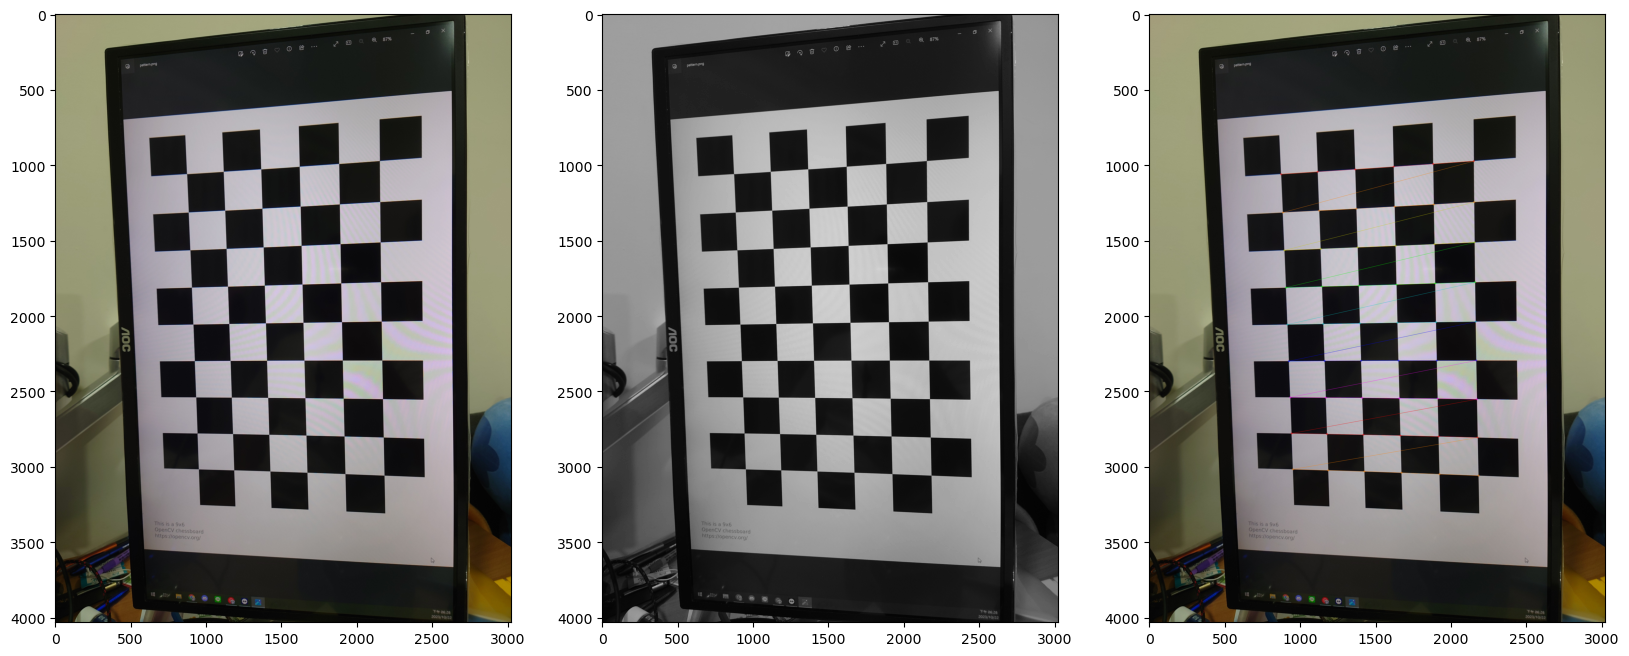

dealing  calibration/phone\20231022_184012.JPG


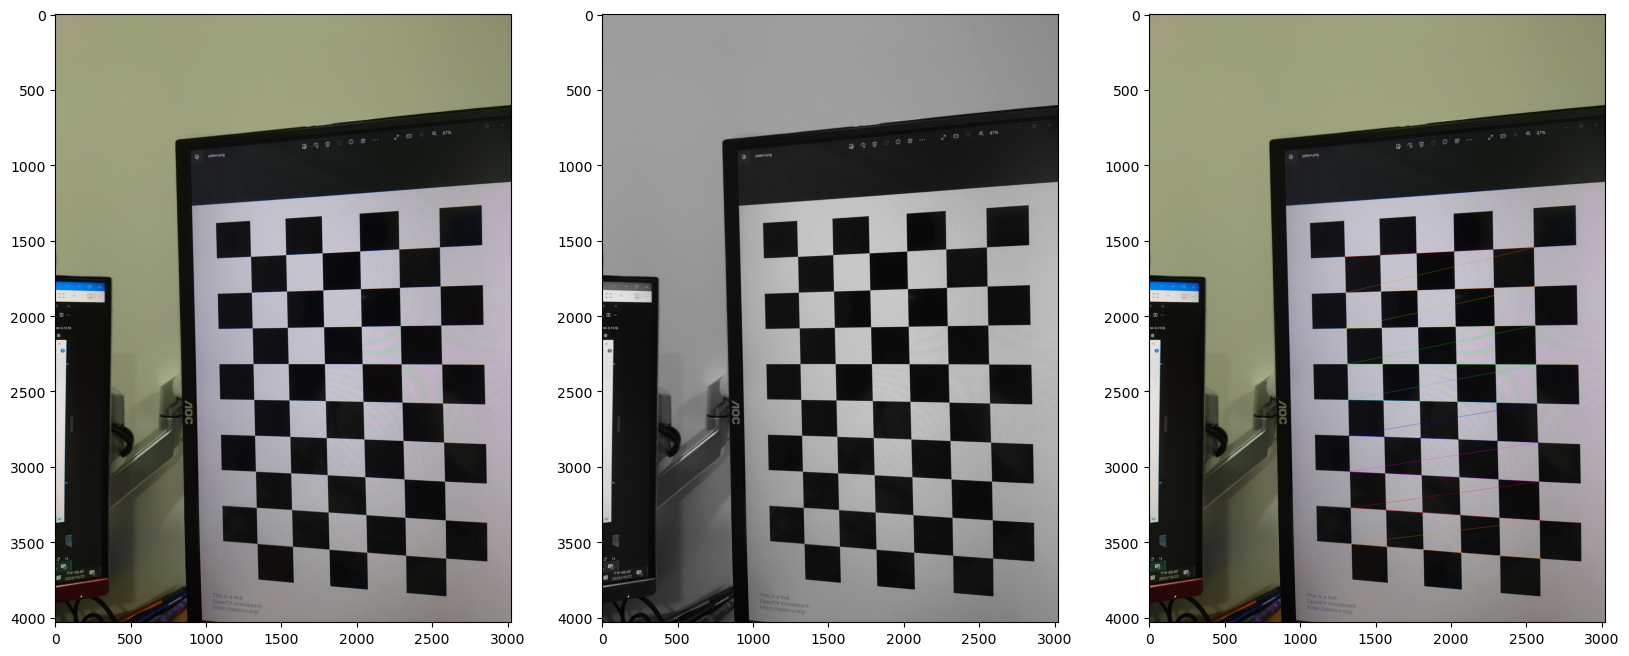

dealing  calibration/phone\20231022_184016.JPG


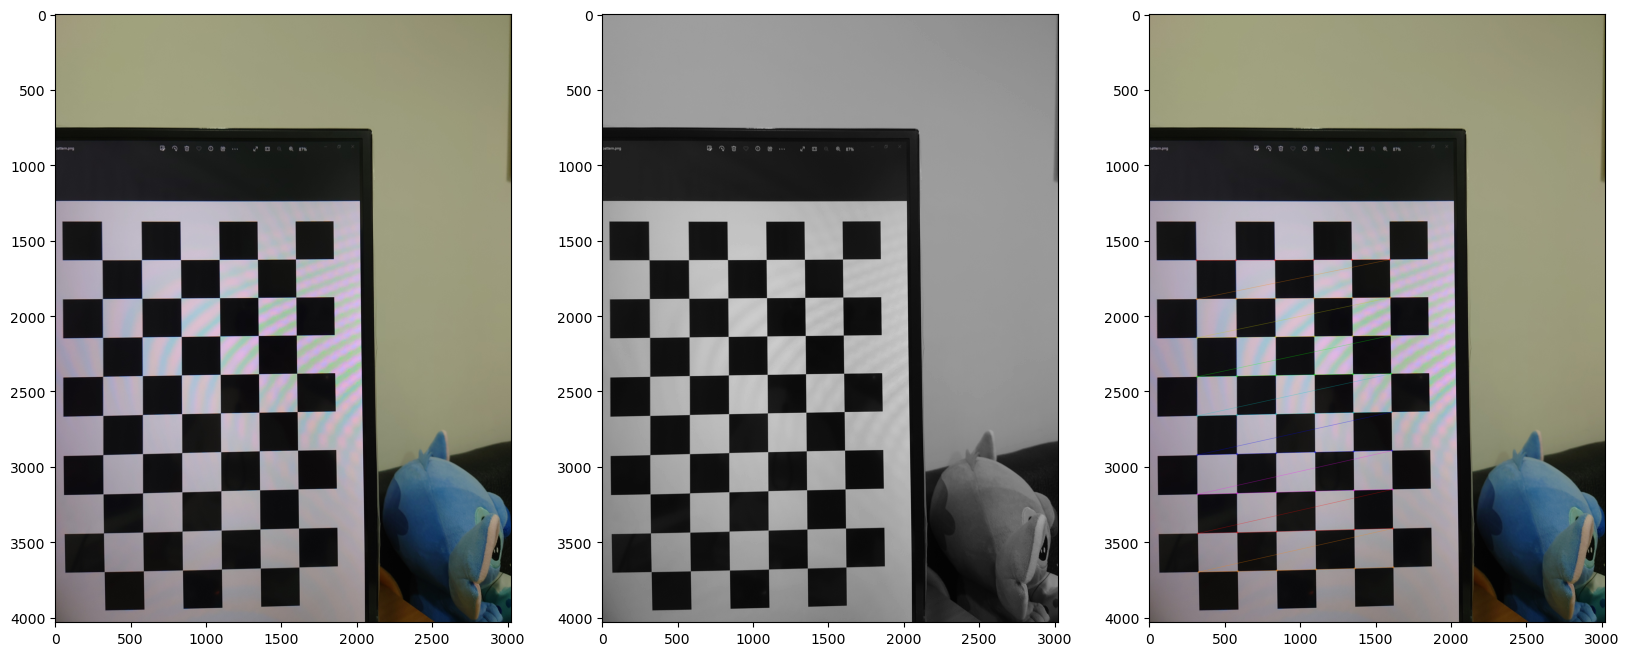

dealing  calibration/phone\20231022_184019.JPG


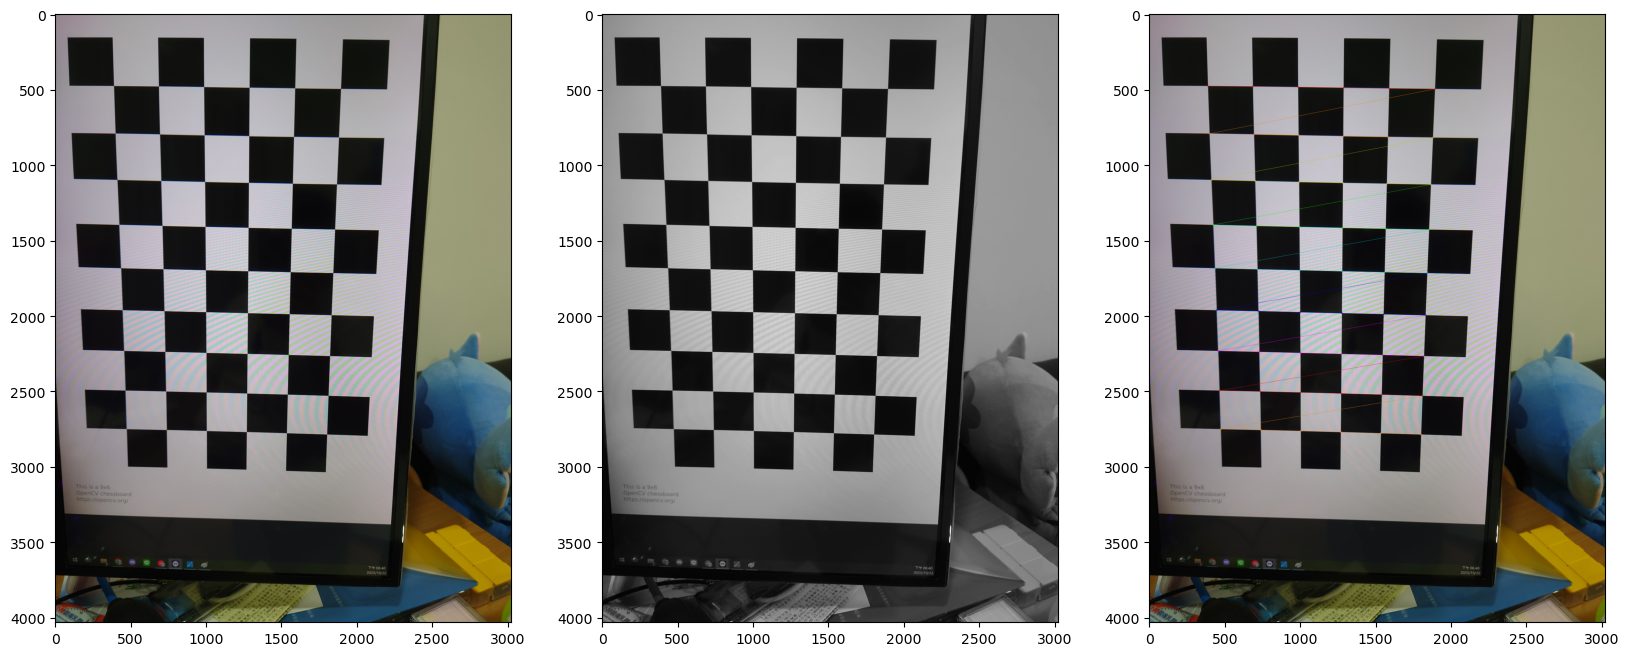

dealing  calibration/phone\20231022_184021.JPG


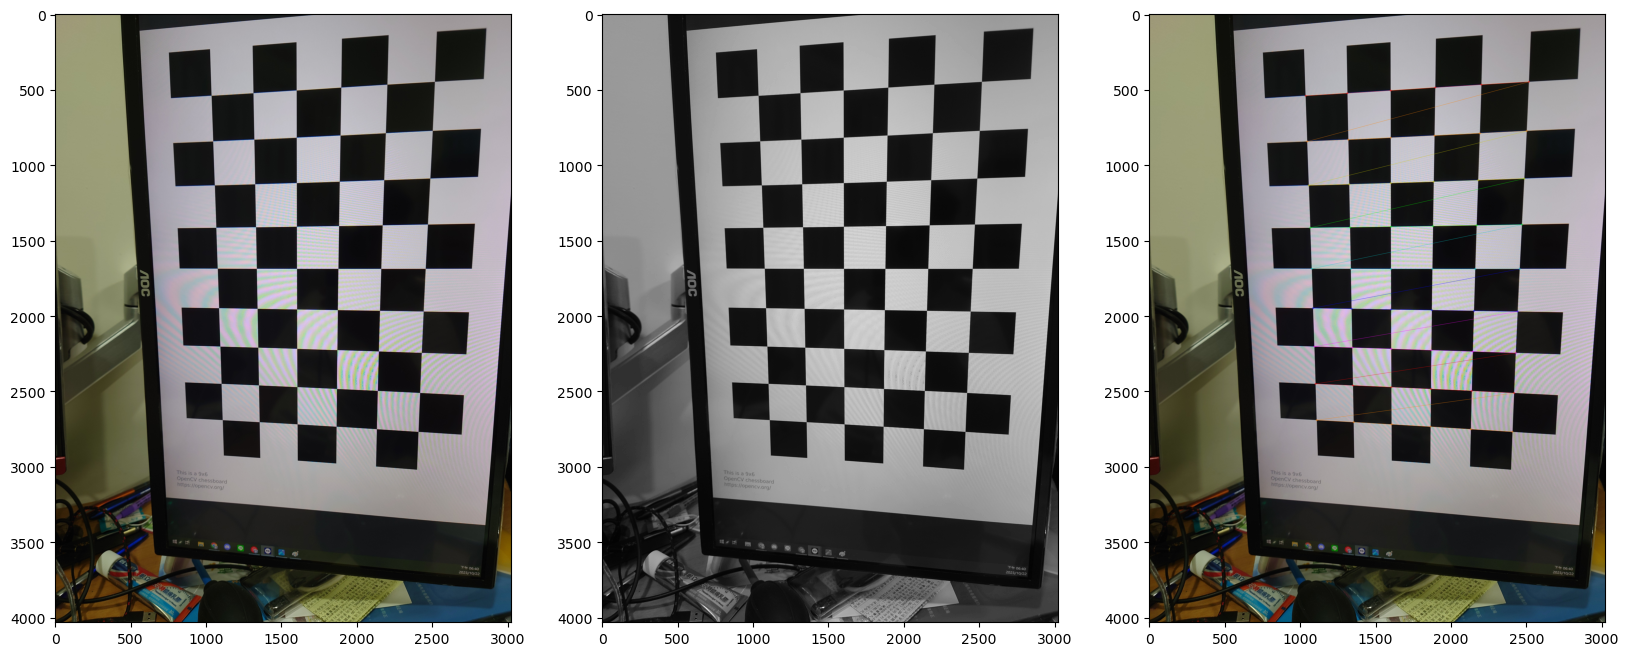

In [16]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob(r'calibration/phone/*.JPG')
print("get ",len(images))

for fname in images:
    print("dealing ",fname)
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(img[:,:,::-1])
    plt.subplot(132)
    plt.imshow(gray, cmap="gray")
    

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (row,col), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        cv.drawChessboardCorners(img, (row,col), corners2, ret)
        plt.subplot(133)
        plt.imshow(img[:,:,::-1])
    plt.show()

In [17]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [18]:
img = cv.imread(r'calibration/phone/20231022_182826.JPG')
h, w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
print(h, w)
print(newcameramtx)

4032 3024
[[2.83904022e+03 0.00000000e+00 1.51138965e+03]
 [0.00000000e+00 2.85091725e+03 1.98194734e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


(4032, 3024, 3)


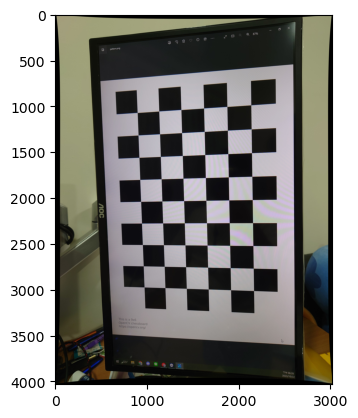

In [19]:
# Using cv.undistort()

# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
print(dst.shape)

# crop the image
# x, y, w, h = roi
# dst = dst[y:y+h, x:x+w]
# print(dst.shape)

cv.imwrite('calibresult.png', dst)
plt.imshow(dst[:,:,::-1])
plt.show()

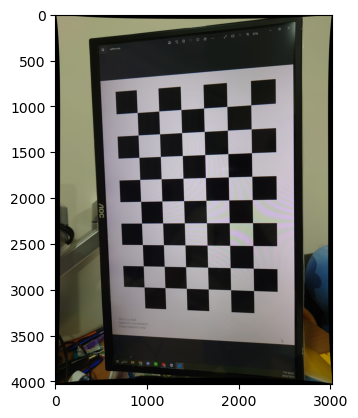

In [20]:
# Using remapping

# undistort
mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)
# crop the image
# x, y, w, h = roi
# dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)
plt.imshow(dst[:,:,::-1])
plt.show()

## 讀取 t_l, t_r, t1_l, t1_r

## 定義光流方法，回傳差值

## 取得 (t_l,t_1_l)的光流(差值)

## 取得 t跟t1的點雲